# Simple MLP on the Iris dataset

This notebook is part of the course given by J. Velcin and J. Cugliari on Deep Learning at the University of Lyon 2.

Start with  simple sequential model

In [3]:
from tensorflow.keras.models import Sequential

model = Sequential()

It can be seen as a *pipeline* of modules.

We define a simple network with:
- an input layer of 4 variables
- one single hidden layer of 64 cells
- an output layer of 3 classes 

In [4]:
from tensorflow.keras.layers import Dense

# 1st solution

model.add(Dense(units=64, activation='relu', input_dim=4))
#model.add(Dense(units=64, activation='sigmoid', input_dim=4))
model.add(Dense(units=3, activation='softmax'))

Alternatively, we can explicitely define the input layer this way:

In [5]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# 2nd solution

inputs = Input(shape=(4,)) # means 4-dimensional vectors
x = Dense(units=64, activation='relu')(inputs)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

We can look at the different tensors.

In [6]:
inputs
#x

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_2')>

Interestingly, this model can be re-used in another (bigger) model.

We setup the model by defining the loss function, optimizer, evaluation measure.

In [7]:
model.compile(loss='categorical_crossentropy', # loss function
              optimizer='sgd', # stochastic gradient descent
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


Now the classifer is ready for learning, similarly to any other model.

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(75, 4)
(75, 4)
(75,)
(75,)


Here, we need to map integers to binary codes:
- 0 -> (1,0,0)
- 1 -> (0,1,0)
- 2 -> (0,0,1)

In [11]:
from tensorflow.keras.utils import to_categorical
train_y_binary = to_categorical(train_y)
test_y_binary = to_categorical(test_y)
#y_binary

We can run the learning process on the dataset.

In [12]:
model.fit(train_X, train_y_binary, epochs=100, batch_size=10)
# 5 is clearly not enough, just for illustrating

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 1.1199 - accuracy: 0.2800
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9013 - accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.7733
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7991 - accuracy: 0.6533
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7610 - accuracy: 0.6667
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.8667
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.7867
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.8000
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.9467
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.8400
Epoch 11/100
8/8 [===========

We can do all of this in an easier way by using the keras wrapper:

In [10]:
# define baseline model
def baseline_model(nb_neurones):
    # create model
    model = Sequential()
    model.add(Dense(nb_neurones, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=baseline_model, nb_neurones=8, epochs=100, batch_size=5, verbose=0)

In [12]:
estimator.fit(train_X, train_y_binary)

2021-12-03 11:40:43.805661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
from sklearn.metrics import zero_one_loss
pred_y=estimator.predict(test_X)
e=zero_one_loss(test_y, pred_y)
print(e)

0.1466666666666666


/Users/jvelcin/arm/envs/cours21/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-12-03 11:40:48.831582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


We can monitor the learning process and even influence it with callbacks.

Let's monitor the accuracy for training and test sets.

In [15]:
#from keras.callbacks import History
history = estimator.fit(train_X, train_y_binary, validation_split=0.33)
# equivalent to: history = estimator.fit(train_X, train_y_binary, validation_split=0.33, callbacks=[History()])

2021-12-03 11:41:42.738824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-03 11:41:42.845907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


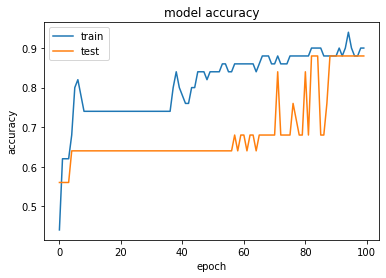

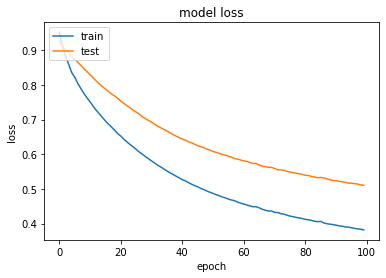

In [16]:
# source: https://machinelearningmastery.com
%matplotlib inline
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# reducing the learning rate when the metrics stagnate
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)
history = estimator.fit(train_X, train_y_binary, callbacks=[reduce_lr], validation_split=0.33)
pred_y=estimator.predict(test_X)
e=zero_one_loss(test_y, pred_y)
print(e)

2021-12-03 11:42:59.315245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-03 11:42:59.411215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.09333333333333338


/Users/jvelcin/arm/envs/cours21/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-12-03 11:43:04.944686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


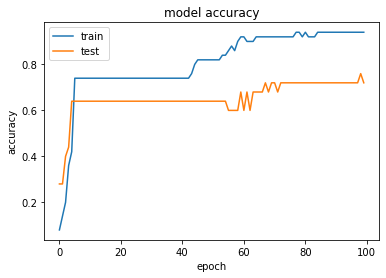

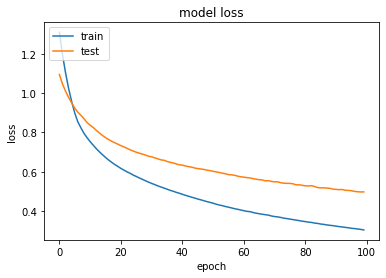

In [17]:
# source: https://machinelearningmastery.com
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Recently we can use Tensorboard to have a better monitoring of the learning process.

In [18]:
#%load_ext tensorboard
%reload_ext tensorboard

import datetime

from tensorflow.keras.callbacks import TensorBoard

# where save the logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# the special tensorboard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# pay attention that we use keras here, not tf.keras

history = estimator.fit(train_X, train_y_binary, validation_split=0.33, callbacks=[tensorboard_callback])

2021-12-03 11:43:27.094586: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-03 11:43:27.094616: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-03 11:43:27.094711: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-03 11:43:27.224784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-03 11:43:27.260679: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-03 11:43:27.260690: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-03 11:43:27.265552: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-03 11:43:27.266049: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-03 11:43:27.266983: I tensorflow/core/profiler

In [19]:
%tensorboard --logdir logs/fit